<a href="https://colab.research.google.com/github/caropeboka/scene-classifier/blob/main/Muhammad_Kevin_Mahendra_Caropeboka_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhammad Kevin Mahendra Caropeboka

MSIB Bisa AI - AI Hacker

Deep Learning

In [ ]:
#mount drive
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
#import libraries
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import cv2
import os
from tqdm import tqdm_notebook as tqdm # Jupyter notebook should use this
from numba import njit,prange,cuda
from numba.experimental import jitclass
os.environ['CUDA_VISIBLE_DEVICES'] = '0'


DATASET_PATH = 'drive/MyDrive/Dataset/15-Scene Image Dataset/15-Scene/'


In [ ]:
def getHistogram(lbp,eps=1e-7):
        (hist, _) = np.histogram(lbp.ravel(),
            bins=np.arange(0,  11),
            range=(0, 10))
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)
        return hist
def describe(image,ltype="normal"):
        if(ltype=="normal"):
            lbp = normalLBP(image)
        elif(ltype=="mean") :
            lbp = meanLBP(image)
        elif(ltype=="median") :
            lbp = medianLBP(image)
        elif(ltype=="new") :
            lbp = newLBP(image)
        else :
            lbp = normalLBP(image)
            print("Error")
        
        return lbp
    
@njit(fastmath=True)
def normalLBP(pd_array):
        row,col  = pd_array.shape
        output  = np.zeros((row,col))
        for i in range(1,row-1):
            for j in range(1,col-1):
                result  = 1*(pd_array[i-1:i+2,j-1:j+2] > pd_array[i,j])
                result =result.reshape((result.shape[0]*result.shape[1]))
                output[i,j] = compute(result)
        return output
    
@njit(fastmath=True)
def meanLBP(pd_array):
        row,col  = pd_array.shape
        output  = np.zeros((row,col))

        for i in range(1,row-1):
            for j in range(1,col-1):
                result  = 1*(pd_array[i-1:i+2,j-1:j+2] > np.mean(pd_array[i-1:i+2,j-1:j+2]))
                result =result.reshape((result.shape[0]*result.shape[1]))
                output[i,j] = compute(result)
        return output
@njit(fastmath=True)
def medianLBP(pd_array):
        row,col  = pd_array.shape
        output  = np.zeros((row,col))

        for i in range(1,row-1):
            for j in range(1,col-1):
                result  = 1*(pd_array[i-1:i+2,j-1:j+2] > np.median(pd_array[i-1:i+2,j-1:j+2]))
                result =result.reshape((result.shape[0]*result.shape[1]))
                output[i,j] = compute(result)
        return output

@njit(fastmath=True)
def newLBP(pd_array):
        row,col  = pd_array.shape
        output  = np.zeros((row,col))

        for i in range(1,row-1):
            for j in range(1,col-1):
                result  = 1*(pd_array[i-1:i+2,j-1:j+2] > pd_array[i,j])
                result =result.reshape((result.shape[0]*result.shape[1]))
                output[i,j] = ncompute(result)
        return output

@njit(fastmath=True)
def compute(X):
        decimal = 0
        X = np.array([X[3],X[0],X[1],X[2],X[5],X[8],X[7],X[6]])
        for i in range(7,-1,-1):
            decimal += (2**i)*X[7-i]
        return decimal 
    
@njit(fastmath=True)
def ncompute(X):
        decimal = 0
        X = np.array([X[3],X[1],X[5],X[7],X[0],X[2],X[8],X[6]])
        for i in range(7,-1,-1):
            decimal += (2**i)*X[7-i]
        return decimal 
    
def pad_with(vector, pad_width, iaxis, kwargs):
        pad_value = kwargs.get('padder', 10)
        vector[:pad_width[0]] = pad_value
        vector[-pad_width[1]:] = pad_value

In [ ]:
#load dataset
dataset_x = []
dataset_y = []
for category in sorted(os.listdir(DATASET_PATH)):
    print('loading category: '+str(int(category)))
    for fname in os.listdir(DATASET_PATH+category):
        img = cv2.imread(DATASET_PATH+category+'/'+fname,2)
        img = cv2.resize(img, (224,224))
        dataset_x.append(getHistogram(describe(img,ltype="new")))
#         dataset_x.append(img.reshape((224*224)))
        dataset_y.append(category)

loading category: 0
loading category: 1
loading category: 2
loading category: 3
loading category: 4
loading category: 5
loading category: 6
loading category: 7
loading category: 8
loading category: 9
loading category: 10
loading category: 11
loading category: 12
loading category: 13
loading category: 14


In [ ]:
import random
dataset_x = np.array(dataset_x)
dataset_y = np.array(dataset_y)
"""shuffle dataset"""
mapIndexPosition = list(zip(dataset_x, dataset_y))
random.shuffle(mapIndexPosition)
# make list separate
dataset_x, dataset_y = zip(*mapIndexPosition)
dataset_x= np.array(dataset_x)
dataset_y= np.array(dataset_y)

X= pd.DataFrame(dataset_x)
Y =pd.DataFrame(dataset_y)

In [ ]:
import cv2

DATASET_PATH = 'drive/MyDrive/Dataset/15-Scene Image Dataset/15-Scene/'
img = cv2.imread(DATASET_PATH+'00'+'/'+'1.jpg',3)
img = cv2.resize(img,(256,256))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

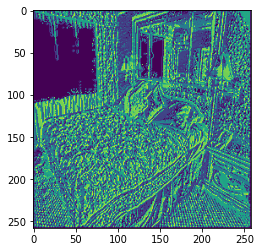

In [ ]:
import matplotlib.pyplot as plt
gray = np.pad(gray, 1, pad_with, padder=0)
plt.imshow(describe(gray,ltype="new"))

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [ ]:
#train
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier()

In [ ]:
#evaluation
y_pred2 = clf.predict(X_test)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred2))

Confusion matrix:
[[ 7  3  1  1 13  6  2  3  1  3  3  3  1  6  2]
 [ 0 27  0  1  2  6  1  5  5  3  8  3  2  1  3]
 [ 0  1 26  5  2  3  7  0  7  5  7  2  3  0 10]
 [ 1  0  2 17  2  3  4  0  8  1  0  2  5  7  6]
 [ 3  2  0  0 27  7  1  2  5  4  3  3  0  7  1]
 [ 5  2  3  1  4 20  4 10  2  1  6  0  3  8  2]
 [ 0  0  4  0  1  0 58  0  2 11  8  1  1  0  5]
 [ 0  4  0  0  6 11  4 26  1  4  2  1  0  3  0]
 [ 1  5  1  1  1  7  1  2 30  1  4  4 13  0  3]
 [ 2  2  1  2  4  2 22  3  1 27  8  5  9  0  9]
 [ 0  7  5  1  5  8 16  1  5 16 28  4  6  2 10]
 [ 0  4  1  0  4  0  4  1 11  3  0 36  9  0  6]
 [ 2  4  2  1  7  3  5  4 14  5  3  4 19  4  1]
 [ 1  0  0  0  9  8  0  3  0  0  0  0  2 35  0]
 [ 1  1  7 10  2  1  6  0 10  5  7  0  2  0 23]]


In [ ]:
print(metrics.classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

          00       0.30      0.13      0.18        55
          01       0.44      0.40      0.42        67
          02       0.49      0.33      0.40        78
          03       0.42      0.29      0.35        58
          04       0.30      0.42      0.35        65
          05       0.24      0.28      0.26        71
          06       0.43      0.64      0.51        91
          07       0.43      0.42      0.43        62
          08       0.29      0.41      0.34        74
          09       0.30      0.28      0.29        97
          10       0.32      0.25      0.28       114
          11       0.53      0.46      0.49        79
          12       0.25      0.24      0.25        78
          13       0.48      0.60      0.53        58
          14       0.28      0.31      0.29        75

    accuracy                           0.36      1122
   macro avg       0.37      0.36      0.36      1122
weighted avg       0.37   